In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.enable_eager_execution()

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test = np.reshape(x_test, (x_test.shape[0], 28*28))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255. 

In [39]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))

class Model(object):
  def __init__(self, num_inputs, num_hidden=32):
    # NOTE: This is called "Glorot" Uniform Initialization
    self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_inputs),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_inputs),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))
  def __call__(self, x):
    return self.forward(x)
  
  def encode(self, x):
    a1 = tf.nn.relu(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    return a1
  
  def decode(self, h):
    a2 = tf.nn.sigmoid(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    return a2

  def forward(self, x):
    a1 = self.encode(x)
    a2 = self.decode(a1)
    return a2
  
  def step(self, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
      current_loss = loss(self(inputs), outputs)
    dW1, dW2, db1, db2 = t.gradient(current_loss, [self.W1, self.W2, self.b1, self.b2])
    
    # model.W1 = model.W1 - learning_rate * dW1
    self.W1.assign_sub(learning_rate * dW1)
    self.W2.assign_sub(learning_rate * dW2)
    self.b1.assign_sub(learning_rate * db1)
    self.b2.assign_sub(learning_rate * db2)

model = Model(x_train.shape[1])
model.forward(x_train[:5, :])

<tf.Tensor: id=19347191, shape=(5, 784), dtype=float32, numpy=
array([[0.6156617 , 0.50212085, 0.5165833 , ..., 0.5235373 , 0.42762995,
        0.568539  ],
       [0.60280627, 0.48985177, 0.5295916 , ..., 0.5227309 , 0.42677543,
        0.58529085],
       [0.581865  , 0.46060836, 0.5307047 , ..., 0.5915604 , 0.44381446,
        0.5446553 ],
       [0.5944582 , 0.4871879 , 0.50618804, ..., 0.5850169 , 0.44822773,
        0.54663146],
       [0.62079245, 0.48316872, 0.54285103, ..., 0.56948525, 0.44420692,
        0.55170447]], dtype=float32)>

In [0]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))

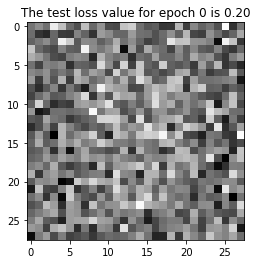

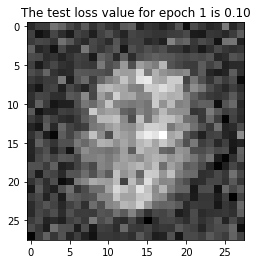

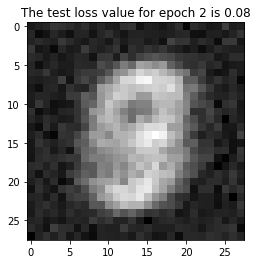

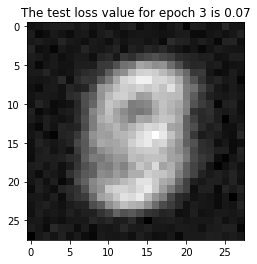

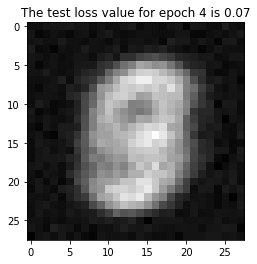

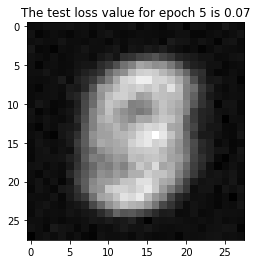

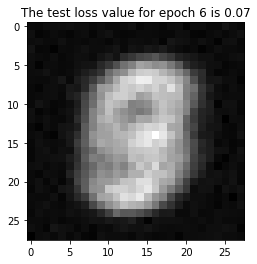

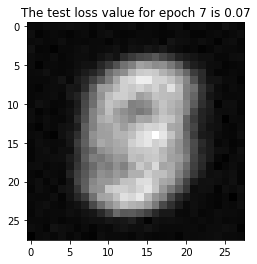

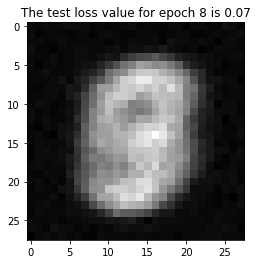

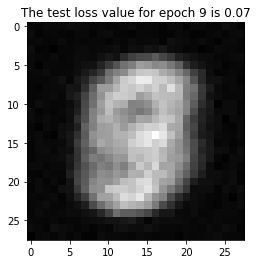

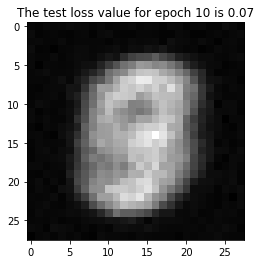

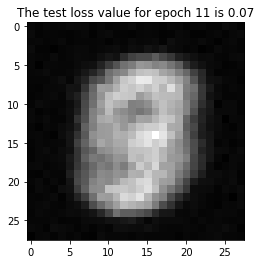

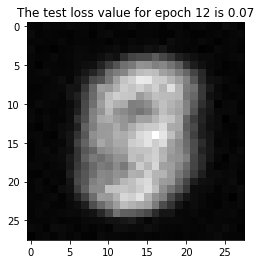

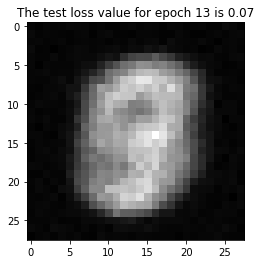

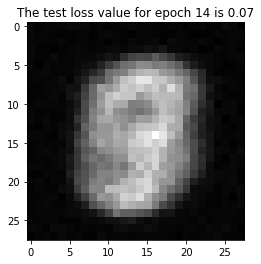

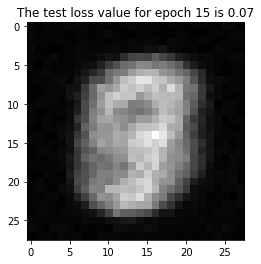

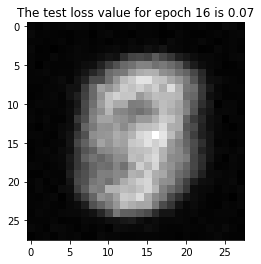

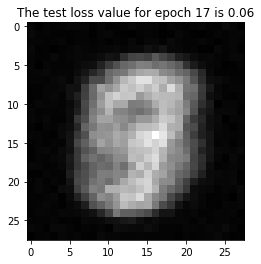

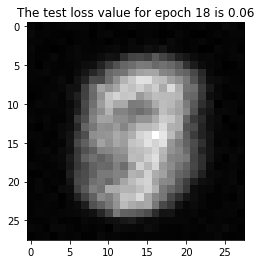

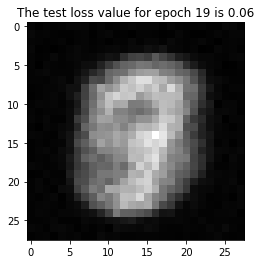

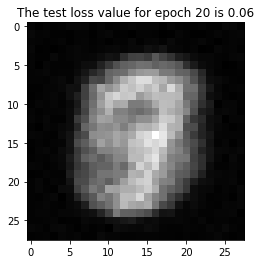

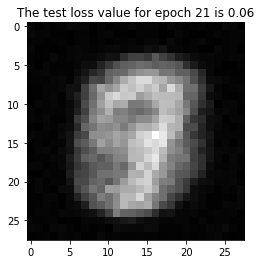

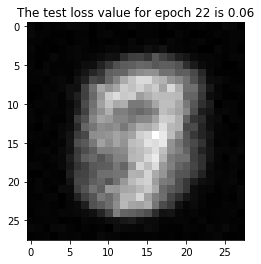

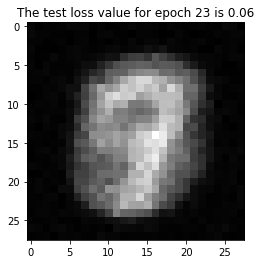

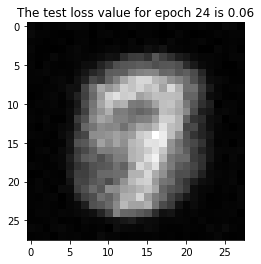

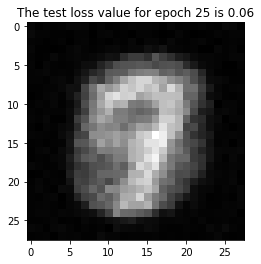

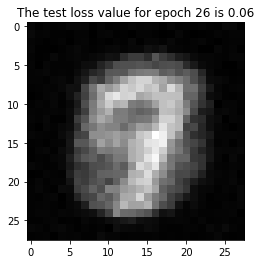

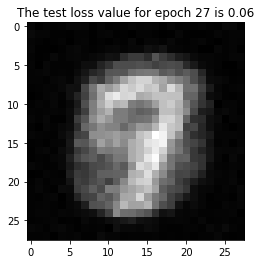

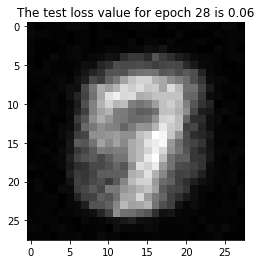

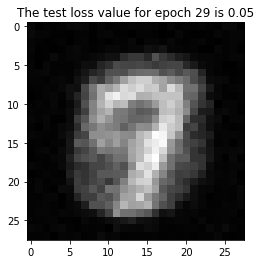

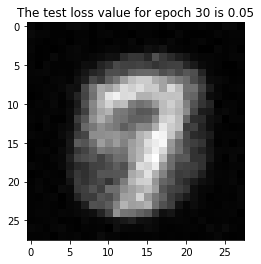

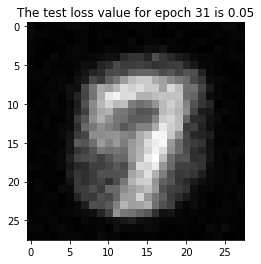

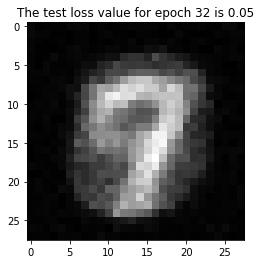

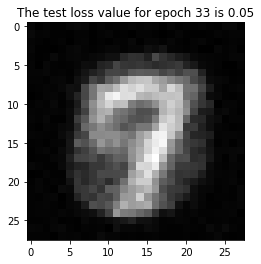

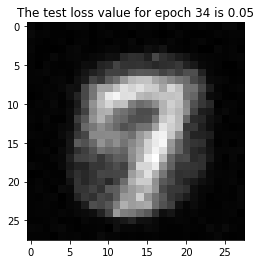

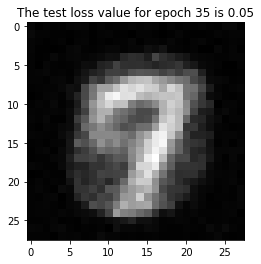

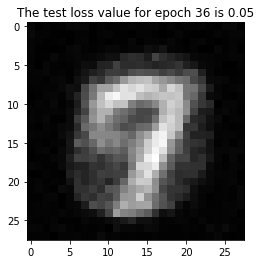

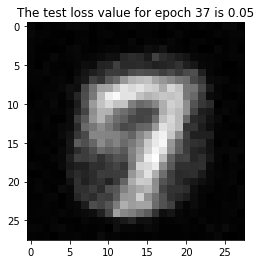

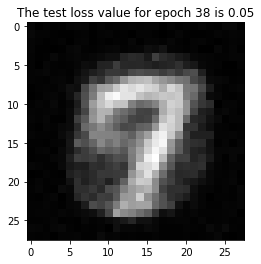

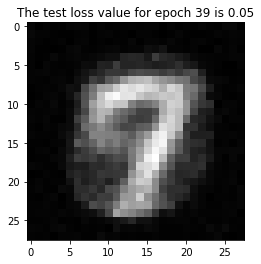

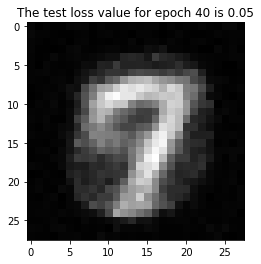

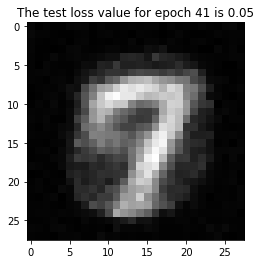

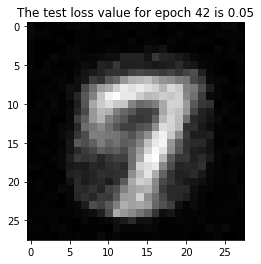

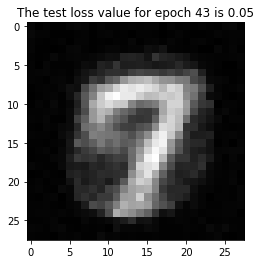

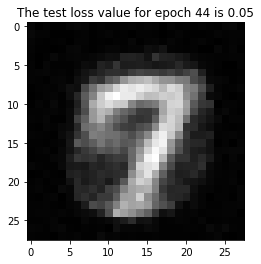

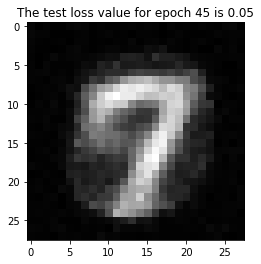

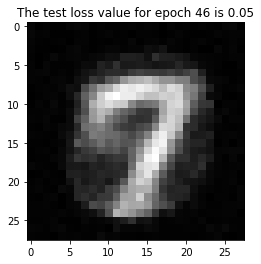

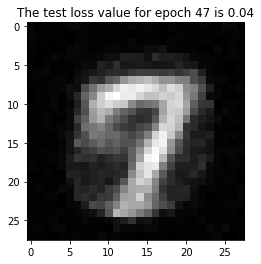

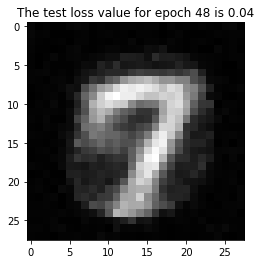

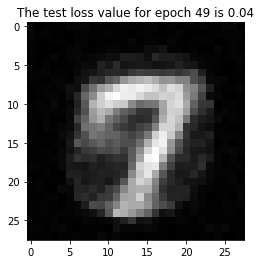

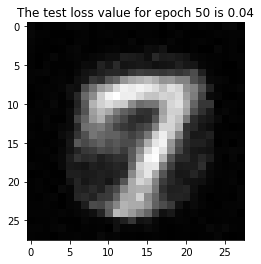

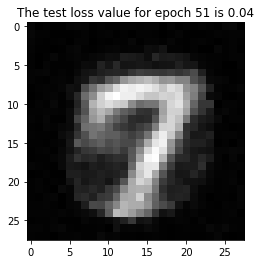

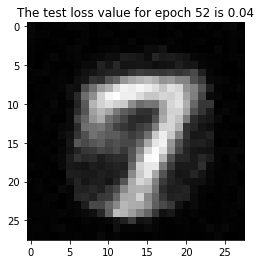

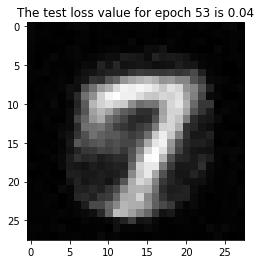

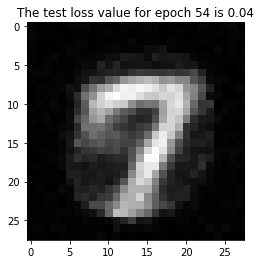

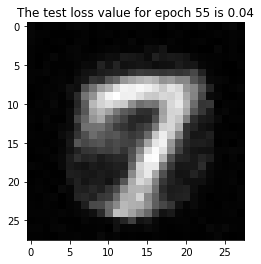

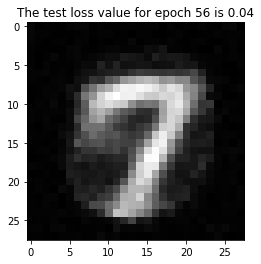

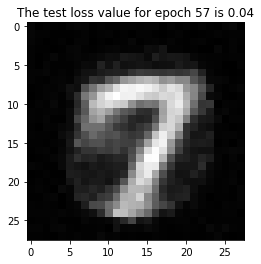

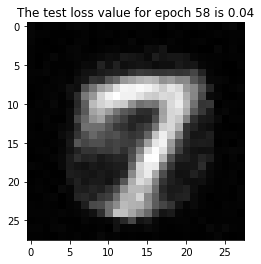

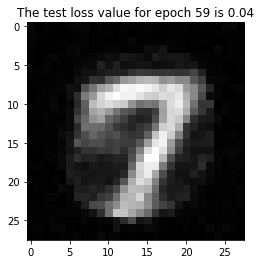

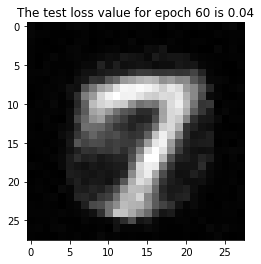

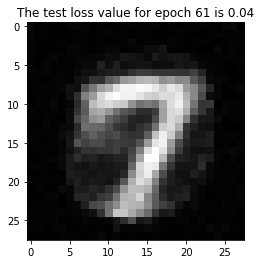

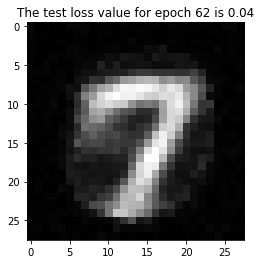

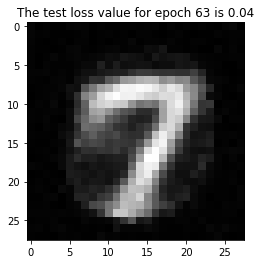

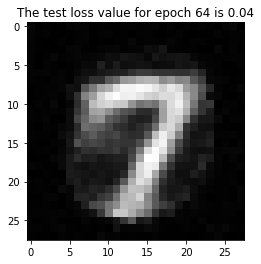

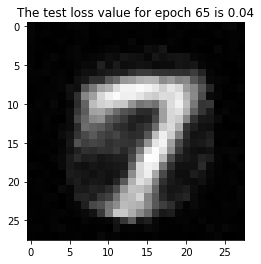

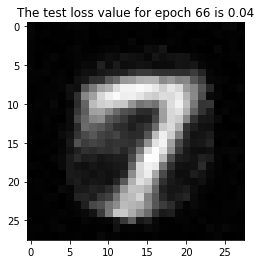

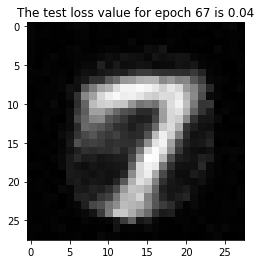

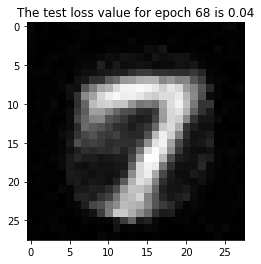

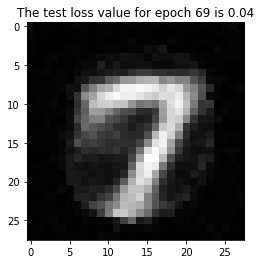

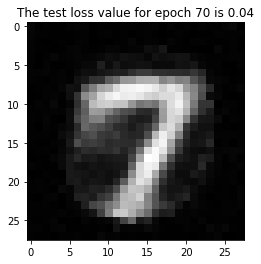

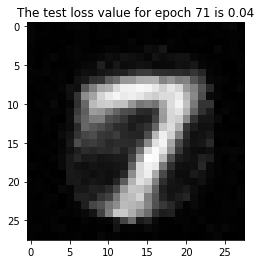

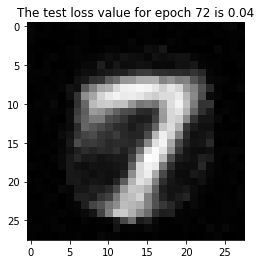

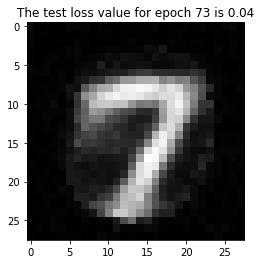

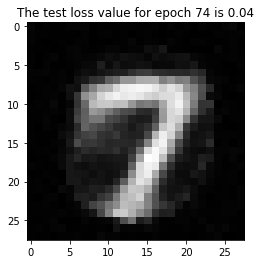

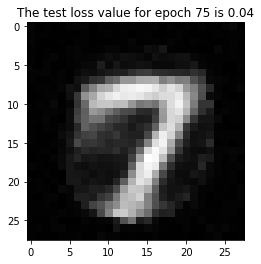

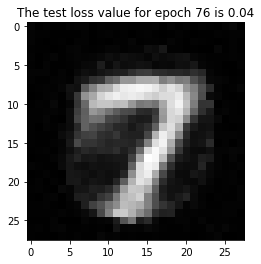

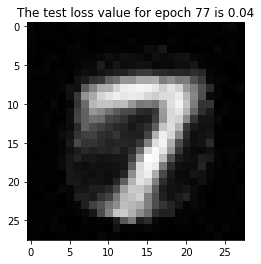

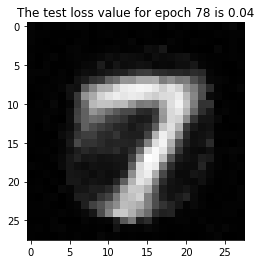

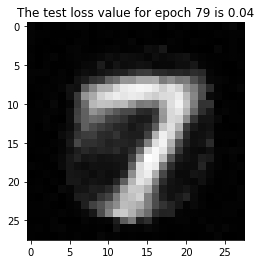

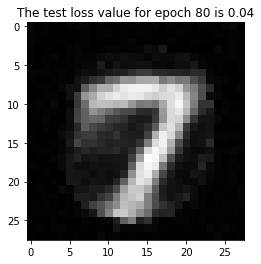

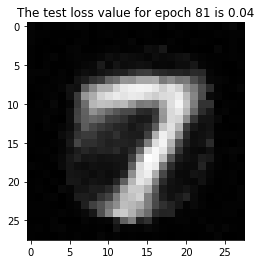

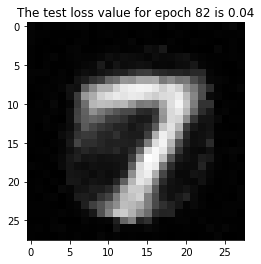

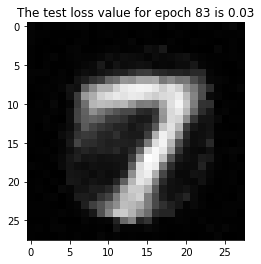

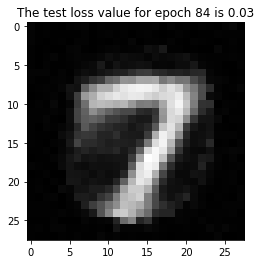

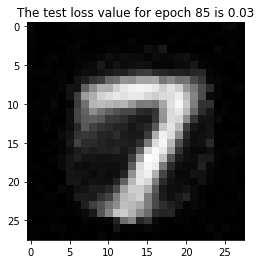

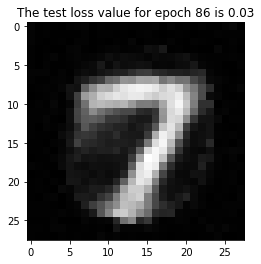

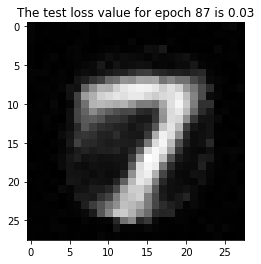

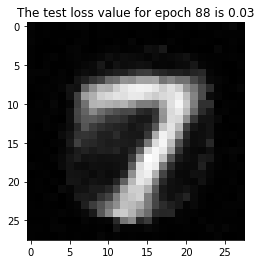

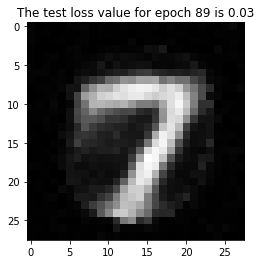

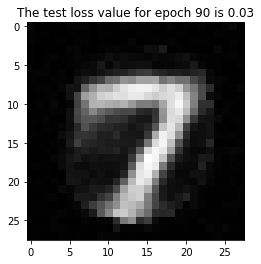

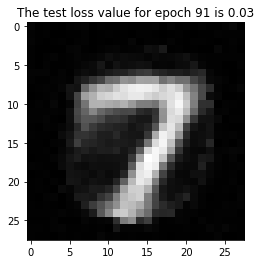

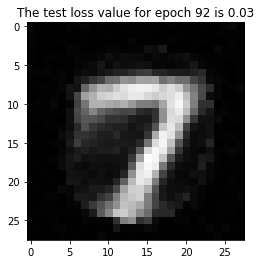

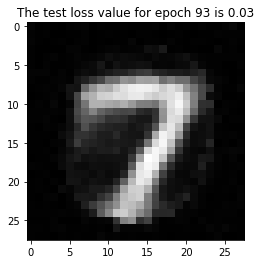

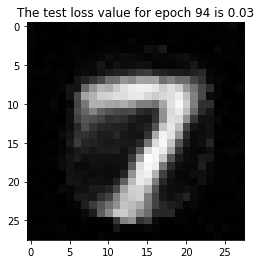

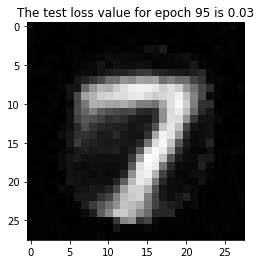

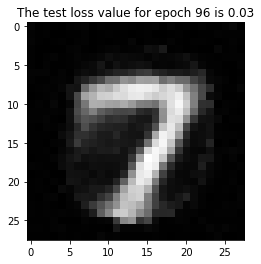

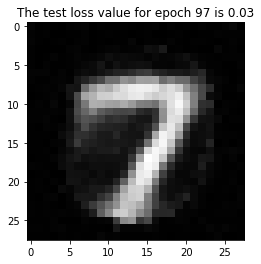

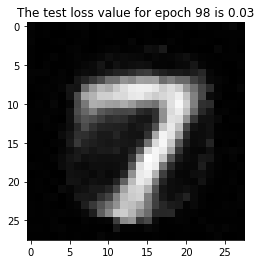

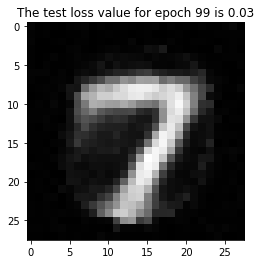

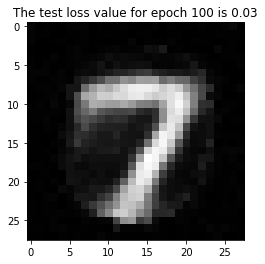

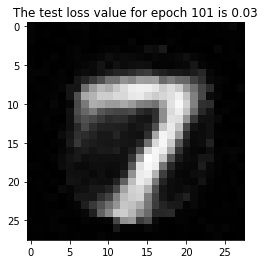

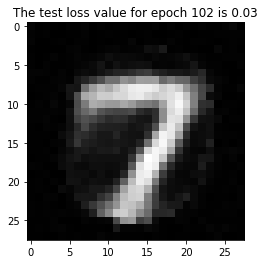

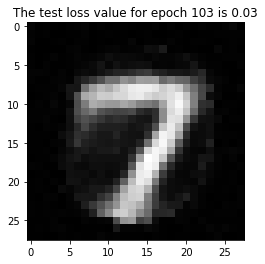

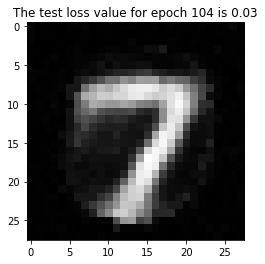

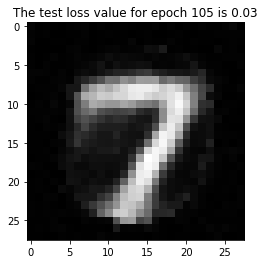

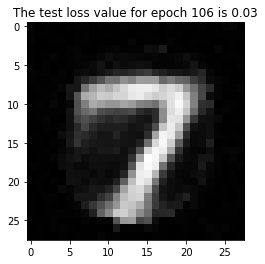

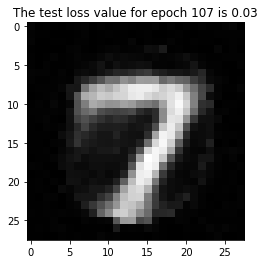

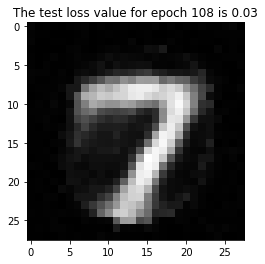

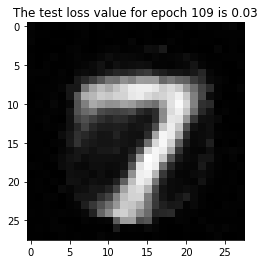

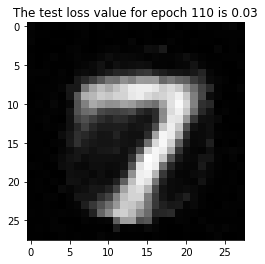

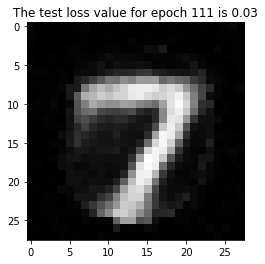

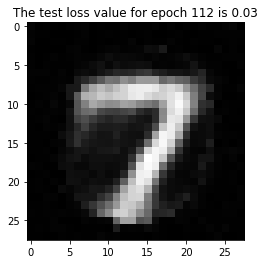

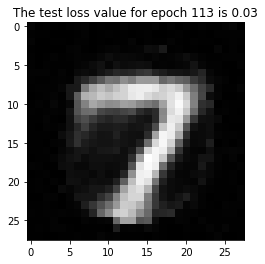

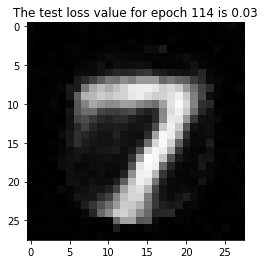

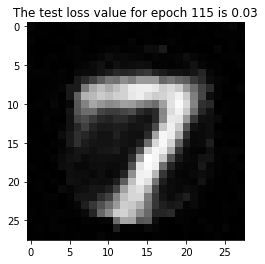

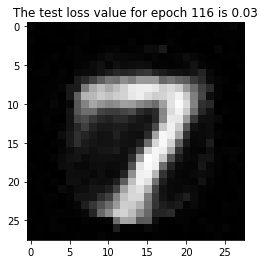

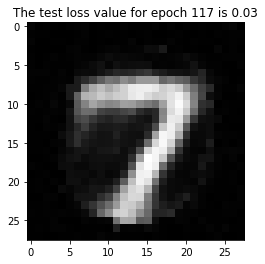

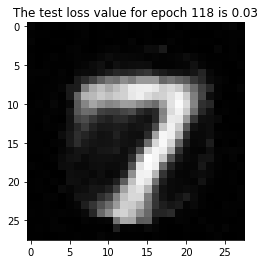

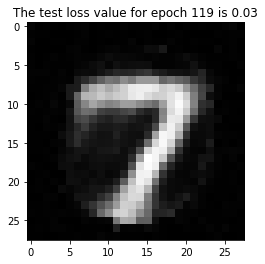

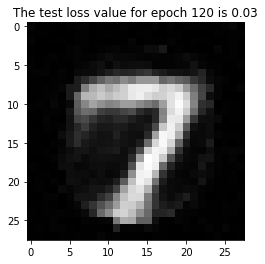

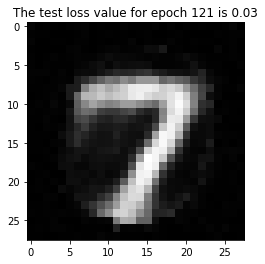

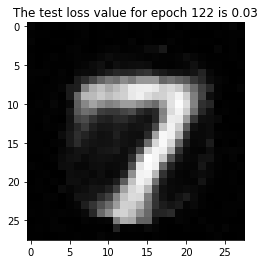

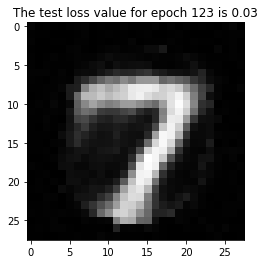

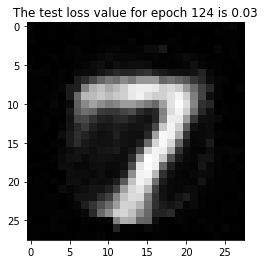

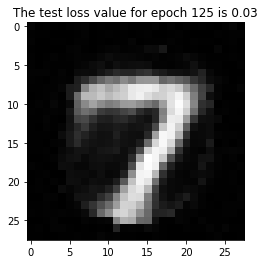

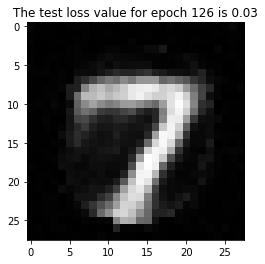

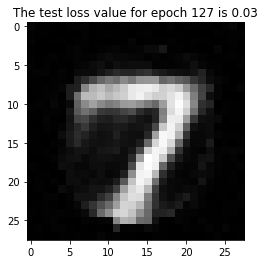

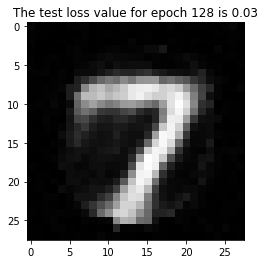

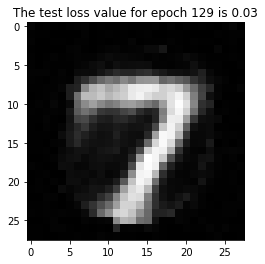

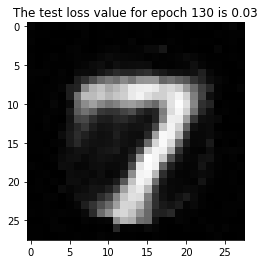

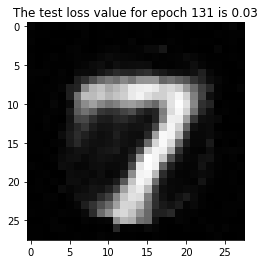

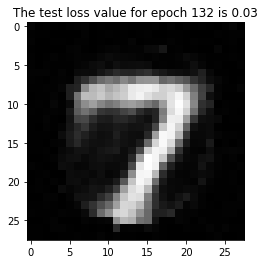

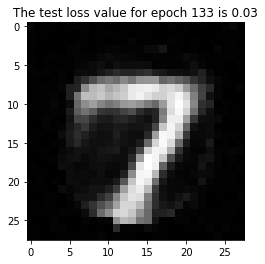

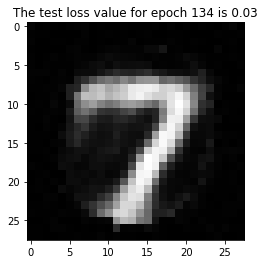

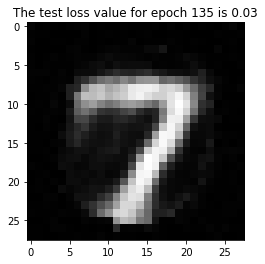

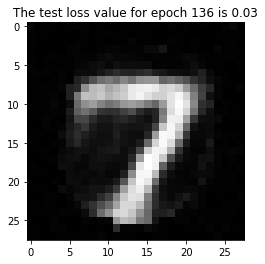

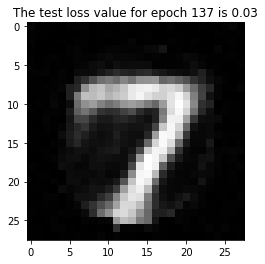

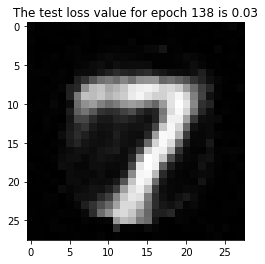

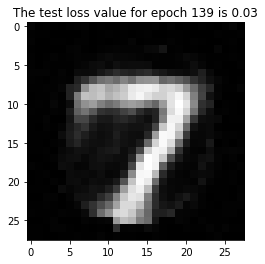

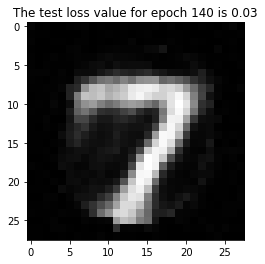

KeyboardInterrupt: ignored

In [50]:
model = Model(x_train.shape[1], num_hidden=64)
learning_rate = .1
batch_size = 128
fig = plt.figure()
for epoch in range(250):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train[start_idx:end_idx, :]
    model.step(x_train_, x_train_, learning_rate)

  #train_loss = loss(x_train, model(x_train))
  test_loss = loss(x_test, model(x_test))

  #print(f'The train loss value for epoch {epoch} is {train_loss:0.2f}')
  #print(f'The test loss value for epoch {epoch} is {test_loss:0.2f}')
  x_test_hat = model(x_test)
  test_img = np.reshape(x_test_hat[0,:], (28, 28))
  plt.imshow(test_img, cmap=plt.cm.gray)
  plt.title(f'The test loss value for epoch {epoch} is {test_loss:0.2f}')
  plt.show()

In [0]:
x_hat_test = model(x_test)

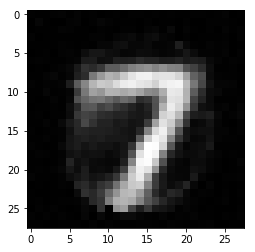

In [43]:
test_img = np.reshape(x_hat_test.numpy()[0,:], (28, 28))
plt.imshow(test_img, cmap=plt.cm.gray)

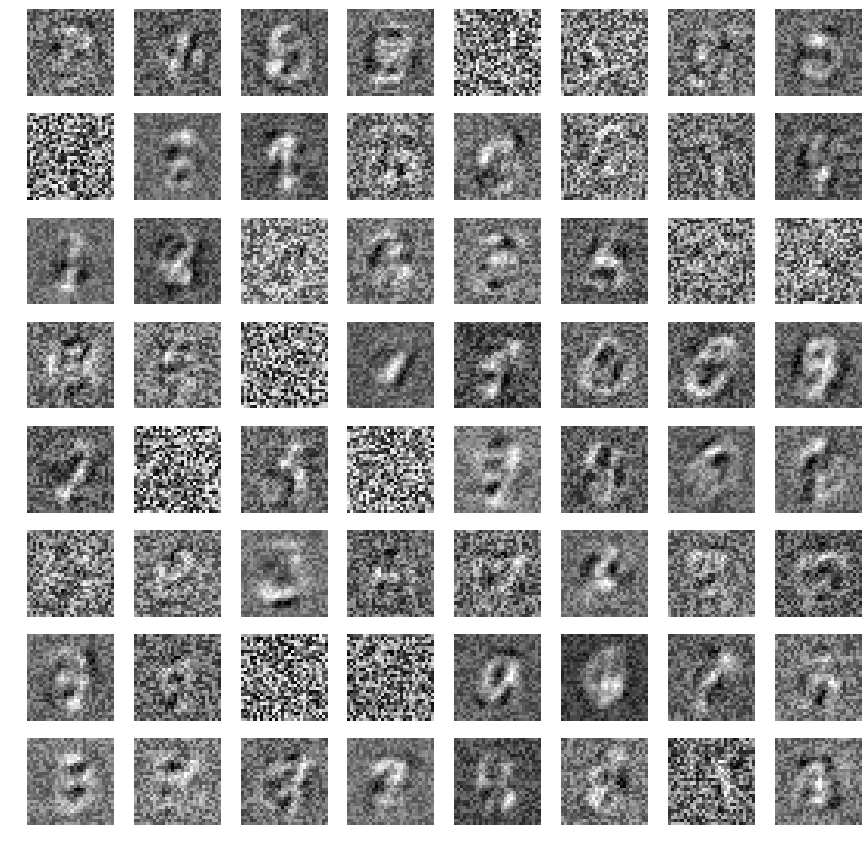

In [51]:
def visualizeW1(model):
  W1 = model.W1
  n_hidden = int(W1.shape[1])
  
  n_elements = np.sqrt(n_hidden).astype(int)
  figure, axes = plt.subplots(nrows=n_elements, ncols=n_elements)
  figure.set_size_inches(15, 15)
  
  for idx, axis in enumerate(axes.flat):
    img = np.reshape(W1[:, idx], (28, 28))
    image = axis.imshow(img, cmap=plt.cm.gray)
    axis.set_frame_on(False)
    axis.set_axis_off()
  
visualizeW1(model)

In [52]:
class LogisticRegression(object):
  def __init__(self, num_inputs, num_outputs=10):
    self.b1 = tf.Variable(tf.random.normal(
                  (1, num_outputs),
                  mean=0.0,
                  stddev=1.0,
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.normal(
                  (num_inputs, num_outputs),
                   mean=0.0,
                  stddev=1.0,
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
  def __call__(self, x):
    return self.forward(x)
  
  def forward(self, x):
    a1 = tf.nn.softmax(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    return a1
  
  def step(self, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
      current_loss = loss(self(inputs), outputs)
    dW1, db1 = t.gradient(current_loss, [self.W1, self.b1])
    
    # model.W1 = model.W1 - learning_rate * dW1
    self.W1.assign_sub(learning_rate * dW1)
    self.b1.assign_sub(learning_rate * db1)
    
x_train_encode = model.encode(x_train)
x_test_encode = model.encode(x_test)

logistic = LogisticRegression(x_train_encode.shape[1])
logistic.forward(x_train_encode[:5, :])

<tf.Tensor: id=28224916, shape=(5, 10), dtype=float32, numpy=
array([[1.00000000e+00, 2.55324385e-26, 0.00000000e+00, 7.57027565e-14,
        1.06447141e-35, 6.17100406e-24, 2.56499126e-16, 1.30662589e-23,
        3.60805217e-24, 2.99743883e-17],
       [9.99984741e-01, 2.47375064e-29, 0.00000000e+00, 5.47455393e-16,
        0.00000000e+00, 7.76843007e-22, 1.52754455e-05, 1.38038219e-31,
        7.02133600e-19, 2.56200480e-19],
       [3.14645357e-02, 4.57762611e-17, 2.03030882e-18, 5.79001266e-04,
        6.85402961e-13, 4.39543324e-12, 2.98763985e-06, 1.76906667e-08,
        9.67953444e-01, 9.99176730e-20],
       [2.44798116e-07, 5.81269962e-20, 2.47273926e-30, 1.11983416e-10,
        2.08289891e-15, 1.57989525e-16, 5.10643003e-15, 9.95105556e-17,
        9.99999762e-01, 4.88996755e-13],
       [2.83557653e-01, 1.54000989e-27, 1.77039992e-33, 1.72993362e-06,
        2.54633799e-22, 3.97101592e-16, 4.32982296e-11, 2.38875699e-19,
        7.16440618e-01, 4.37723099e-21]], dtype=float3

In [53]:
def accuracy(model, x, y):
  y_hat = model(x).numpy().argmax(axis=1)
  acc = (y_hat == y).sum() / y.shape[0]
  return acc
accuracy(logistic, x_train_encode, y_train)


0.10726666666666666

In [0]:
logistic = LogisticRegression(x_train_encode.shape[1])
learning_rate = .2
batch_size = 128

for epoch in range(250):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train_encode[start_idx:end_idx, :]
    y_train_ = tf.one_hot(y_train[start_idx:end_idx], 10)
    logistic.step(x_train_, y_train_, learning_rate)

  train_loss = loss(logistic(x_train_encode), tf.one_hot(y_train, 10))
  test_loss = loss(logistic(x_test_encode), tf.one_hot(y_test, 10))
  train_acc = accuracy(logistic, x_train_encode, y_train)
  test_acc = accuracy(logistic, x_test_encode, y_test)

  print(f'The train loss value for epoch {epoch} is {train_loss:0.2f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.2f}')
  print(f'The train accuracy value for epoch {epoch} is {train_acc:0.2f}')
  print(f'The test accuracy value for epoch {epoch} is {test_acc:0.2f}')

The train loss value for epoch 0 is 0.16
The test loss value for epoch 0 is 0.16
The train accuracy value for epoch 0 is 0.16
The test accuracy value for epoch 0 is 0.17
The train loss value for epoch 1 is 0.15
The test loss value for epoch 1 is 0.15
The train accuracy value for epoch 1 is 0.19
The test accuracy value for epoch 1 is 0.19
The train loss value for epoch 2 is 0.15
The test loss value for epoch 2 is 0.15
The train accuracy value for epoch 2 is 0.21
The test accuracy value for epoch 2 is 0.21
The train loss value for epoch 3 is 0.14
The test loss value for epoch 3 is 0.14
The train accuracy value for epoch 3 is 0.23
The test accuracy value for epoch 3 is 0.23
The train loss value for epoch 4 is 0.14
The test loss value for epoch 4 is 0.14
The train accuracy value for epoch 4 is 0.25
The test accuracy value for epoch 4 is 0.25
The train loss value for epoch 5 is 0.14
The test loss value for epoch 5 is 0.13
The train accuracy value for epoch 5 is 0.26
The test accuracy value 